In [1]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

df = pd.read_csv('MERGED_FOOD_DATA_WITH_GRAMS.csv')
print(df.columns)


Index(['Unnamed: 0.1', 'food', 'serving_size', 'Caloric Value', 'Fat',
       'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
       'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol',
       'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11',
       'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6',
       'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper',
       'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium',
       'Zinc', 'Nutrition Density', 'Category'],
      dtype='object')


# Handling Non-Numeric data

In [3]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(df[non_numeric_columns].head())


                               food serving_size Category
0                      cream cheese    100 grams    Dairy
1                 neufchatel cheese    100 grams    Dairy
2  requeijao cremoso light catupiry    100 grams    Other
3                    ricotta cheese    100 grams    Dairy
4              cream cheese low fat    100 grams    Dairy


# Keeping Numeric columns

In [4]:
numeric_columns = df.select_dtypes(include=['number']).columns
X = df[numeric_columns]
y = df['Category']  


# Train and test split , SMOTE Application 

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Training a Random forest model

In [6]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, min_samples_split=2, class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)

print(rf.score(X_test, y_test))


0.7599164926931107


# Hyperparameter Tuning with Grid search CV 

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]  
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  
                           scoring='accuracy',  
                           verbose=1,
                           n_jobs=-1)  

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy after Hyperparameter Tuning: {accuracy}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\pasul\Downloads\.ipynb_checkpoints\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy after Hyperparameter Tuning: 0.7661795407098121


# Model Evaluation (Classifiaction Report and Confusion matrix)

              precision    recall  f1-score   support

   Beverages       0.00      0.00      0.00         3
       Dairy       0.46      0.65      0.54        17
      Fruits       0.24      0.44      0.31         9
      Grains       0.53      0.39      0.45        23
        Meat       0.60      0.56      0.58        43
       Other       0.84      0.87      0.85       353
     Seafood       0.89      0.57      0.70        14
      Snacks       0.67      0.29      0.40         7
  Vegetables       0.00      0.00      0.00        10

    accuracy                           0.76       479
   macro avg       0.47      0.42      0.42       479
weighted avg       0.76      0.76      0.75       479



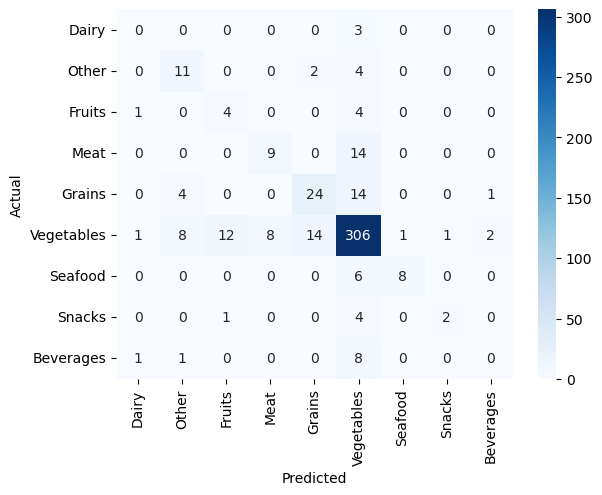

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)  

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Custom over sampling strategy 

In [10]:
from imblearn.over_sampling import SMOTE

class_counts = y_train.value_counts()
sampling_strategy = {
    'Beverages': class_counts['Beverages'] * 2,
    'Vegetables': class_counts['Vegetables'] * 2,
    'Snacks': class_counts['Snacks'] * 2
}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Random forest with Class weights

In [11]:
rf = RandomForestClassifier(
    n_estimators=150,
    class_weight={
        'Beverages': 5,
        'Vegetables': 4,
        'Snacks': 3,
        'Other': 1
    },
    random_state=42
)


# Comparision with XGBoost classifier 

In [13]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 8.5 MB/s eta 0:00:15
    --------------------------------------- 2.6/124.9 MB 8.4 MB/s eta 0:00:15
   -- ------------------------------------- 6.3/124.9 MB 12.9 MB/s eta 0:00:10
   --- ------------------------------------ 10.2/124.9 MB 14.2 MB/s eta 0:00:09
   ---- ----------------------------------- 13.9/124.9 MB 14.8 MB/s eta 0:00:08
   ----- ---------------------------------- 18.6/124.9 MB 16.5 MB/s eta 0:00:07
   ------ --------------------------------- 20.4/124.9 MB 14.9 MB/s eta 0:00:08
   ------- -------------------------------- 24.4/124.9 MB 15.4 MB/s eta 0:00:07
   --------- ------------------------------ 29.9/124.9 MB 16.8 MB/s eta 0:00:06
   ----------- ---------------------------- 34.9/124.9 MB 17.6 MB/s eta 0:00:06
   ------------ --------------------------- 39.3/124.9 MB 17.9 MB/s eta 0:00:05
   -------------- ------------------------- 44.6/124.9

In [15]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

le = LabelEncoder()
y_train_res_encoded = le.fit_transform(y_train_res)
y_test_encoded = le.transform(y_test)

xgb = XGBClassifier(
    n_estimators=200,
    scale_pos_weight=3,
    random_state=42
)

xgb.fit(X_train_res, y_train_res_encoded)

y_pred_xgb = xgb.predict(X_test)

y_pred_xgb_decoded = le.inverse_transform(y_pred_xgb)

print(classification_report(y_test, y_pred_xgb_decoded))


C:\Users\pasul\Downloads\.ipynb_checkpoints\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

   Beverages       0.00      0.00      0.00         3
       Dairy       0.64      0.53      0.58        17
      Fruits       0.00      0.00      0.00         9
      Grains       0.82      0.39      0.53        23
        Meat       0.74      0.33      0.45        43
       Other       0.81      0.95      0.87       353
     Seafood       1.00      0.36      0.53        14
      Snacks       0.50      0.14      0.22         7
  Vegetables       0.00      0.00      0.00        10

    accuracy                           0.78       479
   macro avg       0.50      0.30      0.35       479
weighted avg       0.76      0.78      0.75       479



C:\Users\pasul\Downloads\.ipynb_checkpoints\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:38:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


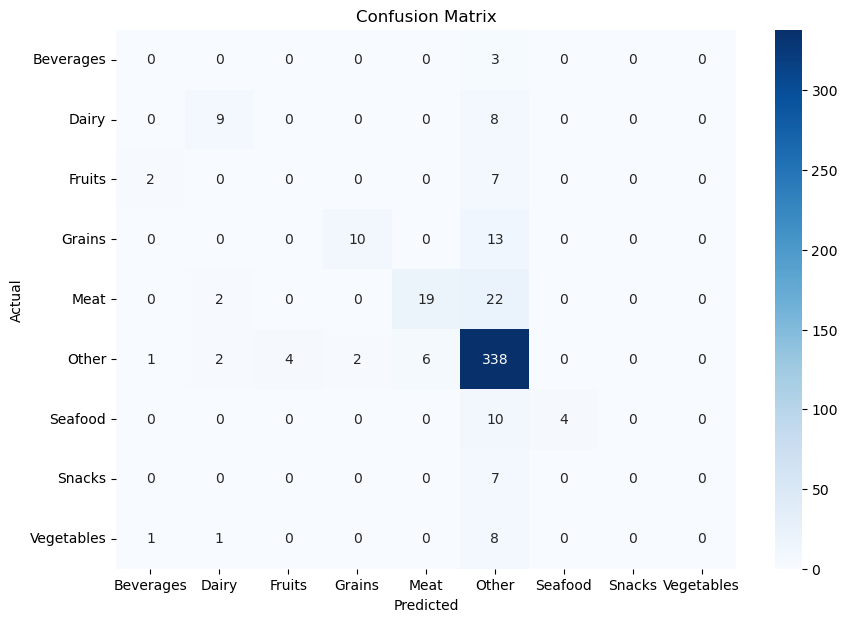

In [20]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

smote = SMOTE(sampling_strategy={
    le.transform(['Beverages'])[0]: 30,
    le.transform(['Vegetables'])[0]: 30,
    le.transform(['Snacks'])[0]: 30
}, random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train_enc)

xgb.fit(X_train_res, y_train_res)

y_pred_best = xgb.predict(X_test)

y_pred_best_labels = le.inverse_transform(y_pred_best)

cm = confusion_matrix(y_test_enc, y_pred_best)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
